In [1]:
# ---------------------------------------------------------------------------
# PROJETO: Análise e Modelagem Preditiva de Custos de Seguro de Saúde
# DESCRIÇÃO: Versão estruturada para organização em pastas.
# AUTOR: Seu Nome
# DATA: 26/06/2025
# ---------------------------------------------------------------------------

# --- ETAPA 0: Setup do Ambiente e Estrutura de Pastas ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib # Usado para salvar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

print("Bibliotecas importadas com sucesso.")

# --- Definição dos diretórios do projeto ---
# O script espera estar dentro da pasta 'notebooks/'
# Para funcionar, o 'insurance.csv' deve estar na pasta 'data/'
BASE_DIR = os.path.dirname(os.getcwd()) # Assume que o notebook está em /notebooks, então volta um nível
DATA_DIR = os.path.join(BASE_DIR, 'data')
MODELS_DIR = os.path.join(BASE_DIR, 'models')
IMG_DIR = os.path.join(BASE_DIR, 'img')

# Criação dos diretórios caso não existam
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(IMG_DIR, exist_ok=True)

print(f"Diretório base do projeto: {BASE_DIR}")
print("Diretórios 'models' e 'img' verificados/criados.")


Bibliotecas importadas com sucesso.
Diretório base do projeto: c:\Users\gv932\OneDrive\Área de Trabalho\DataScience_Recuperacao_GuilhermeVictor
Diretórios 'models' e 'img' verificados/criados.


In [2]:
# --- ETAPA 1: Carregamento dos Dados ---
data_path = os.path.join(DATA_DIR, 'insurance.csv')
try:
    df = pd.read_csv(data_path)
    print(f"Dataset 'insurance.csv' carregado de '{data_path}' com sucesso.")
    print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print(f"ERRO: O arquivo 'insurance.csv' não foi encontrado em '{data_path}'.")
    print("Por favor, baixe o dataset e coloque-o na pasta 'data'.")
    # O script para aqui se o arquivo não for encontrado
    exit()


Dataset 'insurance.csv' carregado de 'c:\Users\gv932\OneDrive\Área de Trabalho\DataScience_Recuperacao_GuilhermeVictor\data\insurance.csv' com sucesso.
O dataset possui 1338 linhas e 7 colunas.


In [4]:
# --- ETAPA 2: Limpeza e Preparação dos Dados ---
# (O código desta seção permanece o mesmo)

# Tratamento de valores duplicados
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

# Separação de features (X) e alvo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Identificação de colunas
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)



--- Iniciando Etapa 3: Análise Exploratória de Dados (EDA) ---


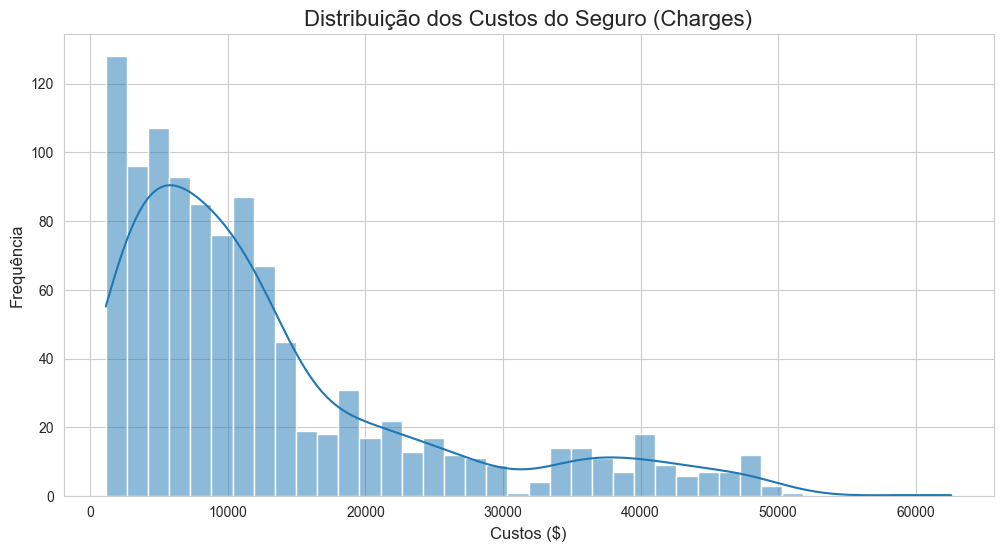

C:\Users\gv932\AppData\Local\Temp\ipykernel_4352\2132657911.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_eda, x='smoker', y='charges', palette='viridis')


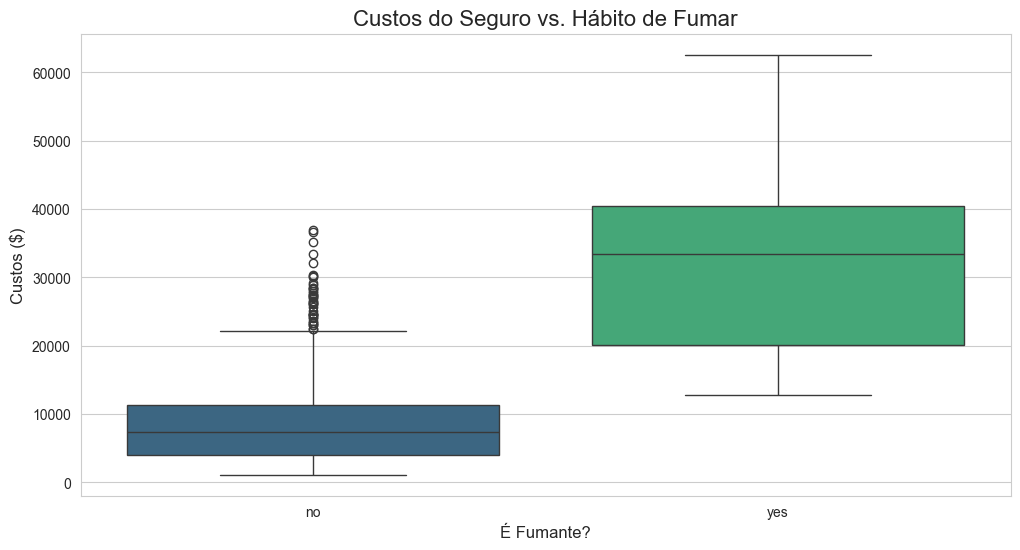

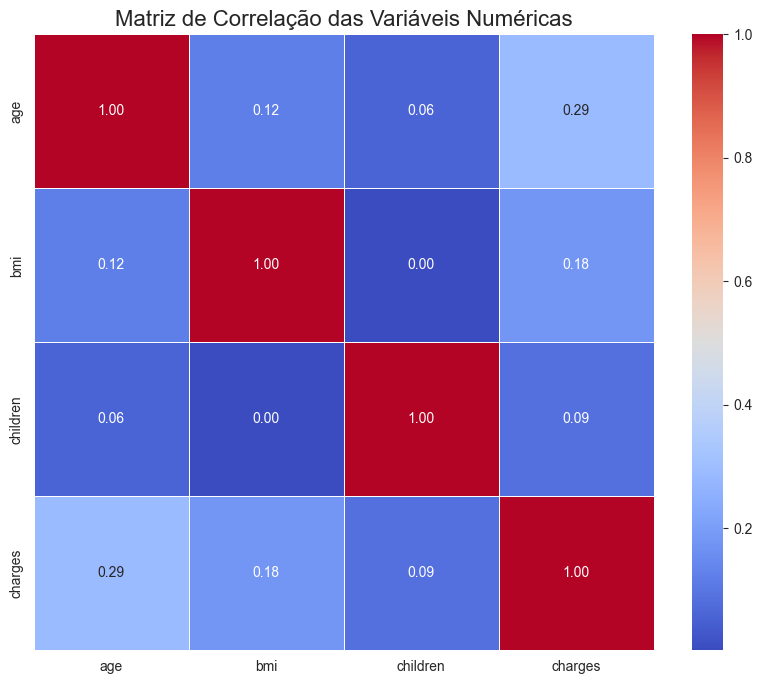


EDA finalizada. Gráficos salvos na pasta 'img/'.


In [5]:
# --- ETAPA 3: Análise Exploratória de Dados (EDA) ---
print("\n--- Iniciando Etapa 3: Análise Exploratória de Dados (EDA) ---")

df_train_eda = X_train.copy()
df_train_eda['charges'] = y_train

sns.set_style("whitegrid")

# Histograma da variável alvo 'charges'
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train_eda, x='charges', kde=True, bins=40)
plt.title('Distribuição dos Custos do Seguro (Charges)', fontsize=16)
plt.xlabel('Custos ($)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.savefig(os.path.join(IMG_DIR, '01_distribution_charges.png')) # Salvar imagem
plt.show()

# Boxplot: Fumante vs Custos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train_eda, x='smoker', y='charges', palette='viridis')
plt.title('Custos do Seguro vs. Hábito de Fumar', fontsize=16)
plt.xlabel('É Fumante?', fontsize=12)
plt.ylabel('Custos ($)', fontsize=12)
plt.savefig(os.path.join(IMG_DIR, '02_boxplot_smoker.png')) # Salvar imagem
plt.show()

# Matriz de Correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df_train_eda[numeric_features + ['charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.savefig(os.path.join(IMG_DIR, '03_correlation_matrix.png')) # Salvar imagem
plt.show()

print("\nEDA finalizada. Gráficos salvos na pasta 'img/'.")


In [6]:
# --- ETAPA 4: Modelagem Preditiva ---
print("\n--- Iniciando Etapa 4: Modelagem Preditiva ---")

# Modelo 1: Regressão Linear
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
r2_lr = metrics.r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))

# Modelo 2: Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
r2_rf = metrics.r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

print("\n--- Resultados da Modelagem ---")
print(f"Regressão Linear -> R²: {r2_lr:.4f} | RMSE: ${rmse_lr:.2f}")
print(f"Random Forest    -> R²: {r2_rf:.4f} | RMSE: ${rmse_rf:.2f}")

# Salvando o melhor modelo (Random Forest)
model_path = os.path.join(MODELS_DIR, 'random_forest_regressor.pkl')
joblib.dump(rf_pipeline, model_path)
print(f"\nModelo Random Forest salvo em: {model_path}")


--- Iniciando Etapa 4: Modelagem Preditiva ---

--- Resultados da Modelagem ---
Regressão Linear -> R²: 0.8069 | RMSE: $5956.34
Random Forest    -> R²: 0.8809 | RMSE: $4678.88

Modelo Random Forest salvo em: c:\Users\gv932\OneDrive\Área de Trabalho\DataScience_Recuperacao_GuilhermeVictor\models\random_forest_regressor.pkl



--- Iniciando Etapa 5: Visualização dos Resultados ---


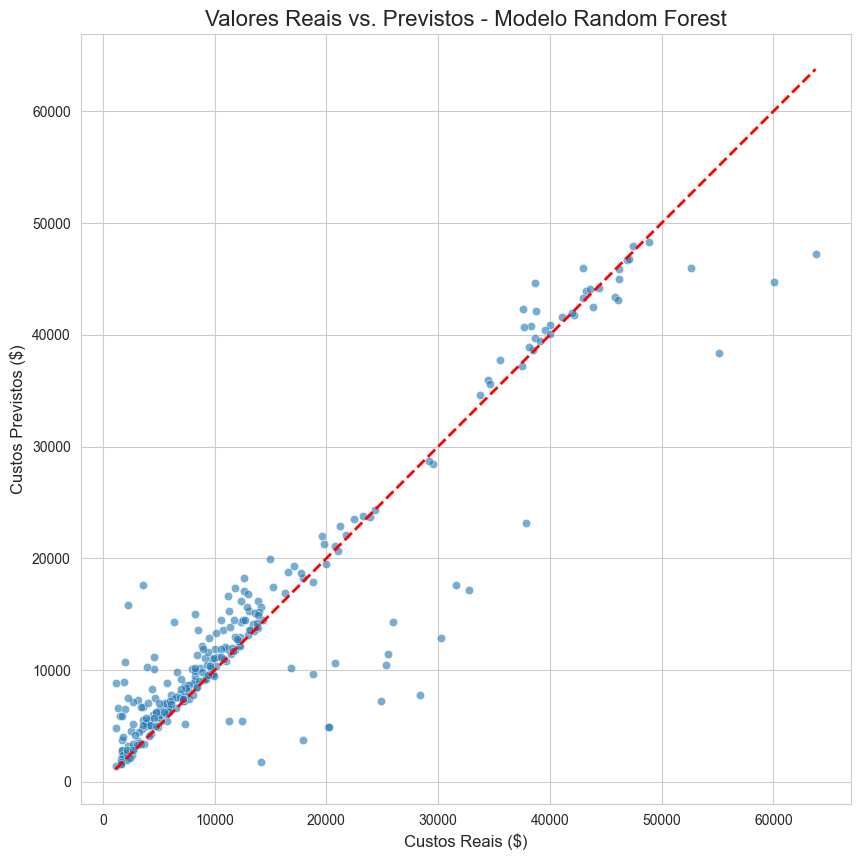

In [7]:
# --- ETAPA 5: Visualização dos Resultados do Modelo ---
print("\n--- Iniciando Etapa 5: Visualização dos Resultados ---")

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reais vs. Previstos - Modelo Random Forest', fontsize=16)
plt.xlabel('Custos Reais ($)', fontsize=12)
plt.ylabel('Custos Previstos ($)', fontsize=12)
plt.axis('equal'); plt.axis('square')
plt.savefig(os.path.join(IMG_DIR, '04_results_real_vs_predicted.png')) # Salvar imagem
plt.show()


In [8]:
# --- ETAPA 6: Geração do `requirements.txt` ---
print("\n--- Gerando o arquivo requirements.txt ---")
requirements = [
    f"pandas=={pd.__version__}",
    f"numpy=={np.__version__}",
    f"seaborn=={sns.__version__}",
    f"matplotlib=={plt.matplotlib.__version__}",
    f"scikit-learn=={joblib.__version__}", # joblib é parte do scikit-learn
    "jupyterlab" # ou "notebook"
]
requirements_path = os.path.join(BASE_DIR, 'requirements.txt')
with open(requirements_path, 'w') as f:
    for req in requirements:
        f.write(req + '\n')

print(f"Arquivo 'requirements.txt' salvo em: {requirements_path}")
print("\n--- Fim do Projeto ---")



--- Gerando o arquivo requirements.txt ---
Arquivo 'requirements.txt' salvo em: c:\Users\gv932\OneDrive\Área de Trabalho\DataScience_Recuperacao_GuilhermeVictor\requirements.txt

--- Fim do Projeto ---
